<a href="https://colab.research.google.com/github/statrav/pages/blob/main/Ch4_Recursions_and_Dynamic_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Recursion
[Repeating Problems and Divicde and Conquer]

- Repeating Problem : 큰 하나의 문제를 쪼개서 다시 반복되는 또다른 문제로 변형 → 이 때 문제의 크기는 작아짐
- Divide : 문제를 쪼개다
- Conquer : 문제를 해결하다
- def calculateBudget(self) method는 동일하지만 더 작은 calculateBudget을 CALL함 (Divided된 작은 문제)
- Repeating Problem의 예시) factorial(!), Great Common Divisior(최대공약수 - 유클리드 알고리즘)
- function call은 반복
- parameter 사이즈는 줄어듬
- 수학적귀납법과 유사


[Recursion]

- 하나의 programming method
- function을 call할 때 그 function 안의 function을 call함

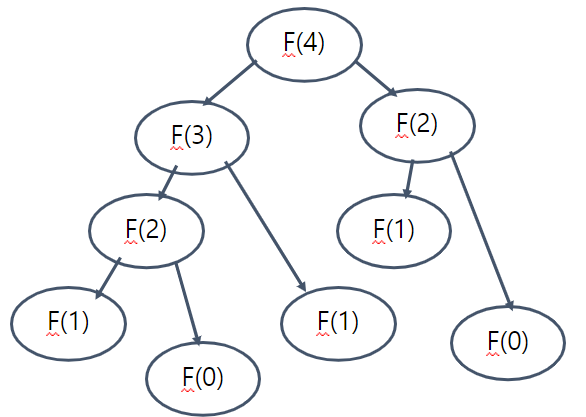

In [ ]:
def Fibonacci(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    intRet = Fibonacci(n-1) + Fibonacci(n-2)
    return intRet

[Recursions and Stackframe]

- Stackframe : function call이 진행된 역사를 기록하고 있는 frame
- push : function이 call 되었을 때
- pop : function이 return되거나 end되었을 때
- Local variable : function 속에서만 접근이 가능한 변수
- function call parameter : 특정 function call instance에 할당된 parameter

# 02. Merge Sort and Problems in Recursions
[Merge Sort]

- recrusion을 이용한 sorting 알고리즘
- list를 더이상 쪼갤 수 없는 수준까지 쪼개면서 sorting

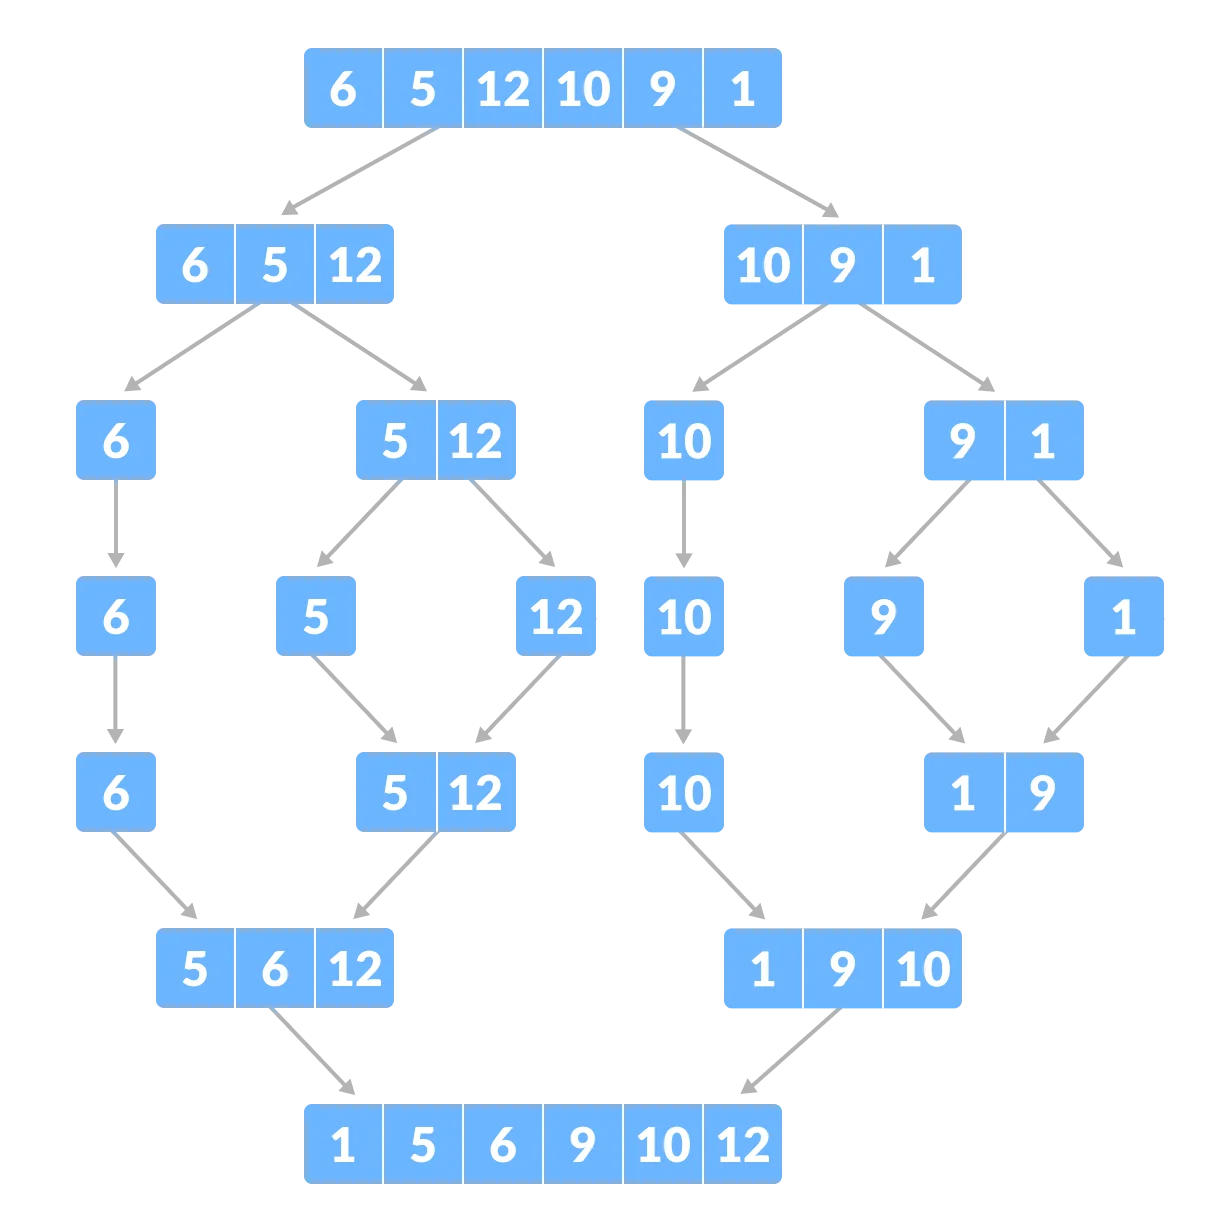

[출처] https://www.programiz.com/dsa/merge-sort

[Recursion의 문제점]

- function call이 너무 많음
- 동일 parameter의 call이 너무 많음
- 불필요한 시간과 용량을 차지함

# 03. Dynamic Programming
[Dynamic Programming]

- overlapping sub-instance가 있는 recurrence의 문제를 푸는 일반적인 알고리즘
- 아래의 이미지의 경우 F(2)가 2번, F(1)이 3번, F(0)이 2번 overlapping되고 있음

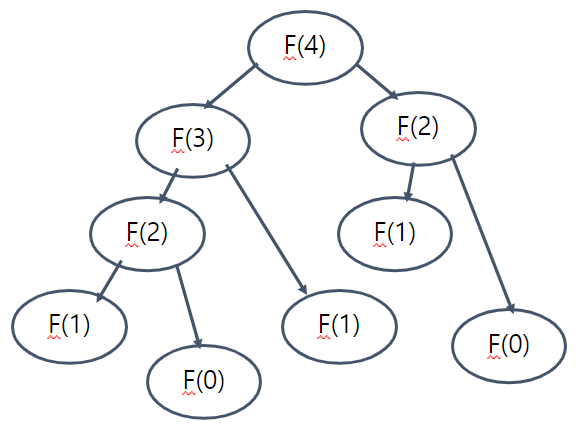

- 작은 사이즈에 있었던 결과를 활용하여, 큰 사이즈의 솔루션을 도출함
- 순서대로 작은 사이즈부터 solution 도출

[Memoization]

- 결과를 기록해야 함 (기존의 function의 결과를 재활용하기 위함)
- bottom-up 접근 (Recursion : Top-Down 접근)
- 반복되는 동일한 function call을 줄이기 위한 과정에서 function call의 결과를 저장하는 공간


In [ ]:
#Setting Memoization Table
def FibonacciDP(n):
    dicFibonacci = {}
    dicFibonacci[0] = 0
    dicFibonacci[1] = 1
    #Building up a bigger solutions
    for itr in range(2, n+1):
        dicFibonacci[itr] = dicFibonacci[itr-1] + dicFibonacci[itr-2]
    return dicFibonacci[n]

# 04. Process of Assembly Line Scheduling
- Dynamic Programming : 공정계획, Scheduling 기법 등에서 다양하게 사용

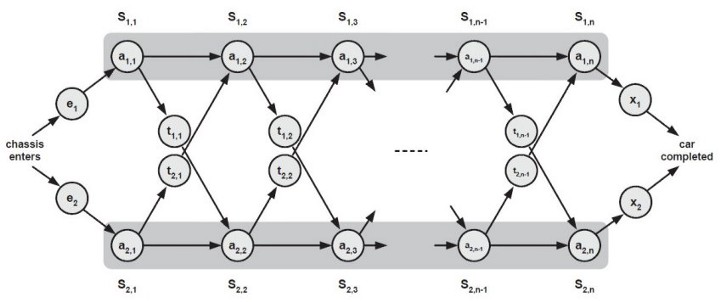

[출처] https://medium.com/@jpethani11/what-is-assembly-line-scheduling-1573d563fcb9

[Process of Assembly Line scheduling]

- Minimum Travel time table : 특정 생산라인이 특정 station까지 도착할 수 있는 최소의 시간을 기록하는 표
- Retrace table : 바로 직전에 어떠한 경로를 통해서 왔는지를 저장하는 표

In [ ]:
#Recursion Version

class AssemblyLines:
    timeStation = [[7,9,3,4,8,4],[8,5,6,4,5,7]]
    timeBelt = [[2,2,3,1,3,4,3,],[4,2,1,2,2,1,2]]
    intCount = 0
    def Scheduling(self, idxLine, idxStation):
        print("Calculate scheduling : line, station : ", idxLine, idxStation, "(", self.intCount, "recursion calls)")
        self.intCount = self.intCount+1
        #Escape Routine
        if idxStation == 0:
            if idxLine == 1:
                return self.timeBelt[0][0] + self.timeStation[0][0]
            elif idxLine == 2:
                return self.timeBelt[1][0] + self.timeStation[1][0]
        #Recursive Call
        if idxLine == 1:
            costLine1 = self.Scheduling(1, idxStation-1) + self.timeStation[0][idxStation]
            costLine2 = self.Scheduling(2, idxStation-1) + self.timeStation[0][idxStation] + self.timeBelt[1][idxStation]
        elif idxLine == 2:
            costLine1 = self.Scheduling(1, idxStation-1) + self.timeStation[1][idxStation] + self.timeBelt[0][idxStation]
            costLine2 = self.Scheduling(2, idxStation-1) + self.timeStation[1][idxStation]
        if costLine1 > costLine2:
            return costLine2
        else:
            return costLine1
        
    def startScheduling(self):
        numStation = len(self.timeStation[0])
        costLine1 = self.scheduling(1, numStation - 1) + self.timeBelt[0][numStation]
        costLine2 = self.scheduling(2, numStation - 1) + self.timeBelt[1][numStation]
        if costLine1 > costLine2:
            return costLine2
        else:
            return costLine1